<a href="https://colab.research.google.com/github/JMandal02/Data-Science_pwskills/blob/main/Anomaly_Detection_%26_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1**
## **What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.**

# **Answer**

## **What is Anomaly Detection?**
Anomaly Detection identifies **unusual data points** that do not follow normal patterns.  
Used in fraud detection, system monitoring, security, and sensor data.


## **1. Point Anomaly**
A single value is abnormal.

### Example:
- A sudden **₹5,00,000** transaction when normal is ₹500–₹5000.
- Temperature sensor showing 120°C instead of 30°C.



## **2. Contextual Anomaly**
A value is abnormal **in a specific context** (time, season, location).

### Example:
- 30°C is normal in summer but abnormal in winter.
- High electricity use at 3 AM.



## **3. Collective Anomaly**
A sequence of values is abnormal together.

### Example:
- Continuous spikes in network traffic → possible DDoS attack.
- Sensor sending 0 values for 20 minutes → malfunction.




# **Question 2**
## Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of approach and suitable use cases.

# **Answer**


## **Isolation Forest**
### Approach:
- Random trees isolate anomalies quickly.

### Best For:
- Large numeric datasets  
- Fraud detection  
- High-dimensional data  


## **DBSCAN**
### Approach:
- Clusters dense regions; points outside clusters are anomalies.

### Best For:
- Spatial/geographical data  
- Noise detection  
- Arbitrary-shaped clusters  


## **Local Outlier Factor (LOF)**
### Approach:
- Detects points with lower local density than neighbors.

### Best For:
- Small–medium datasets  
- Local/neighbor-based anomalies  
- Uneven density data  



# **Question 3**
## What are the key components of a Time Series? Explain each with one example.



# **Answer**

A time series has four main components:


## **1. Trend**
Long-term upward or downward movement.

### Example:
- Internet users increasing every year.



## **2. Seasonality**
Repeating pattern at fixed intervals.

### Example:
- Ice cream sales peak every summer.  
- Electricity usage high every evening.



## **3. Cyclic Patterns**
Long-term fluctuations, not fixed like seasonality.

### Example:
- Economic boom → recession cycles.



## **4. Random / Irregular Component**
Unpredictable variations with no pattern.

### Example:
- Sudden stock market crash.  
- Sensor glitches.



# **Question 4**
## **Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?**

# **Answer**

##  **What is Stationary?**
A time series is **stationary** if its statistical properties do **not change over time**, meaning:

- Mean is constant  
- Variance is constant  
- Autocorrelation depends only on lag, not time  

Most forecasting models (AR, MA, ARIMA) require stationarity.

---

#  **How to Test Stationarity?**

### **1. Plot the series**
- If trend or seasonality is present → non-stationary.

### **2. ACF Plot**
- Slow decay → non-stationary.

### **3. ADF Test (Augmented Dickey-Fuller)**
- **p-value < 0.05 → Stationary**  
- **p-value ≥ 0.05 → Non-stationary**

---

# **How to Make a Series Stationary?**

### **1. Differencing**
Remove trend:
\[
Y'_t = Y_t - Y_{t-1}
\]

### **2. Seasonal Differencing**
Remove seasonality:
\[
Y'_t = Y_t - Y_{t-12}
\]

### **3. Log Transform**
Reduces increasing variance:
\[
Y'_t = \log(Y_t)
\]

### **4. Detrending**
Subtract a fitted line/trend.






# **Question 5**
## **Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.**


# **Answer**

Below are the main differences:


# **1. AR (AutoRegressive Model)**  
### **Structure:**  
Uses past values of the series.  
\[
Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \epsilon_t
\]

### **Use:**  
Data with **correlation in lagged values**, no seasonality.



# **2. MA (Moving Average Model)**  
### **Structure:**  
Uses past forecast **errors**.  
\[
Y_t = c + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots
\]

### **Use:**  
Short-term forecasting, noise smoothing.



# **3. ARIMA (AutoRegressive Integrated Moving Average)**  
### **Structure:**  
Combines **AR + differencing + MA**.  
Parameters: **(p, d, q)**  
- p = AR terms  
- d = differencing  
- q = MA terms  

### **Use:**  
Non-seasonal data with trend.


# **4. SARIMA (Seasonal ARIMA)**  
### **Structure:**  
ARIMA + seasonal components  
\[
(p,d,q)(P,D,Q)_s
\]

### **Use:**  
Data with **strong seasonality** (monthly, quarterly patterns).  
Example: airline passengers, sales.


# **5. SARIMAX (Seasonal ARIMA with Exogenous Variables)**  
### **Structure:**  
SARIMA + external features (X).  
Example features:  
- Temperature  
- Holidays  
- Promotions  

### **Use:**  
Seasonal forecasting **with external factors** affecting the output.





# **Question 6**
## **Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.**


# **Answer**

The AirPassengers dataset contains monthly airline passenger numbers from 1949–1960.  
We load it, visualize it, and perform classical decomposition.



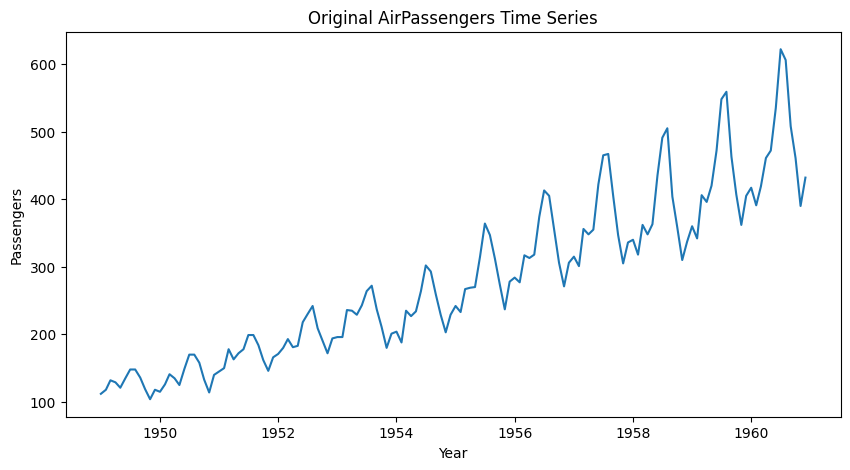

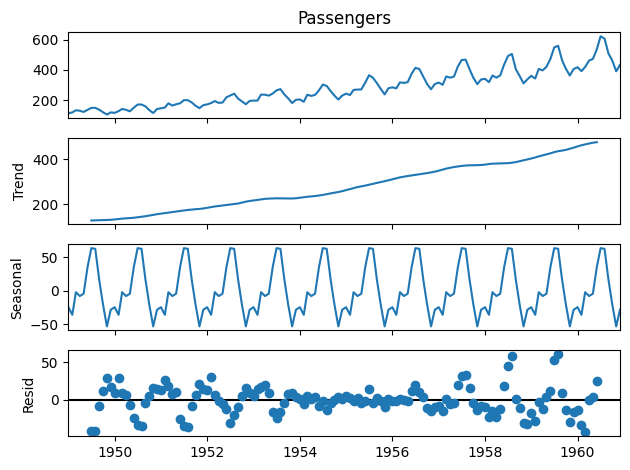

In [1]:
# Q6 Code — Time Series Decomposition

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load AirPassengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=["Month"], index_col="Month")

# Plot original series
plt.figure(figsize=(10,5))
plt.plot(df, label="AirPassengers")
plt.title("Original AirPassengers Time Series")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

# Decomposition
result = seasonal_decompose(df['Passengers'], model='additive')

result.plot()
plt.show()


# **Question 7**
## **Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies and visualize them on a 2D scatter plot.**


# **Answer**

Isolation Forest isolates abnormal data points by randomly splitting the data.  
We will generate a sample dataset and detect anomalies.


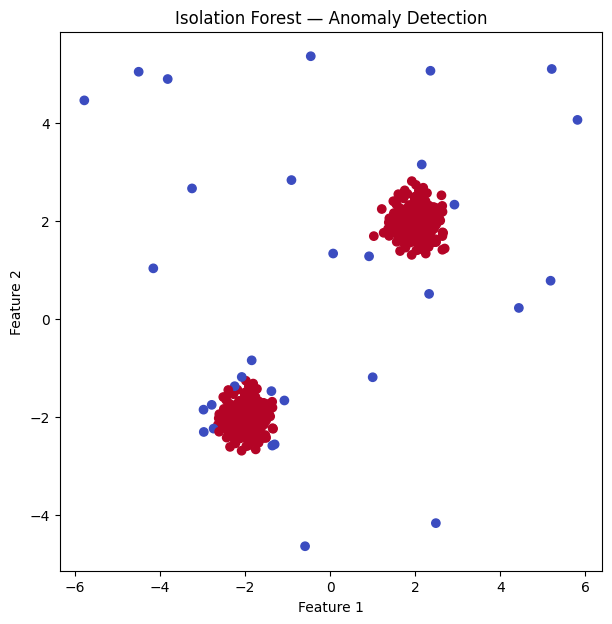

In [2]:
# Q7 Code — Isolation Forest Anomaly Detection

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generate sample 2D numerical data
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(300, 2)
X = np.r_[X + 2, X - 2]  # two clusters

# Add anomalies
outliers = rng.uniform(low=-6, high=6, size=(20, 2))
X = np.r_[X, outliers]

# Apply Isolation Forest
clf = IsolationForest(contamination=0.05, random_state=42)
labels = clf.fit_predict(X)

# Plot
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm')
plt.title("Isolation Forest — Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# **Question 8**
## **Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.**


# **Answer**

SARIMA handles both **trend** and **seasonality**.  
We train SARIMA(1,1,1)(1,1,1,12) and forecast the next 12 months.


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


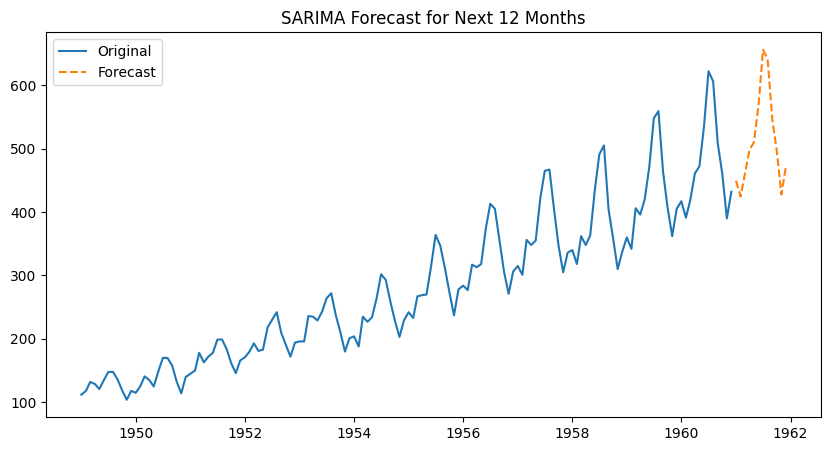

In [4]:
# Q8 Code — SARIMA Forecasting

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=["Month"], index_col="Month")

# SARIMA model
model = SARIMAX(df['Passengers'],
                order=(1,1,1),
                seasonal_order=(1,1,1,12))

results = model.fit()

# Forecast 12 months
forecast = results.forecast(12)

# Plot
plt.figure(figsize=(10,5))
plt.plot(df, label="Original")
plt.plot(forecast, label="Forecast", linestyle='--')
plt.title("SARIMA Forecast for Next 12 Months")
plt.legend()
plt.show()


# **Question 9**
## **Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.**


# **Answer**

Local Outlier Factor compares the **local density** of a point with its neighbors.


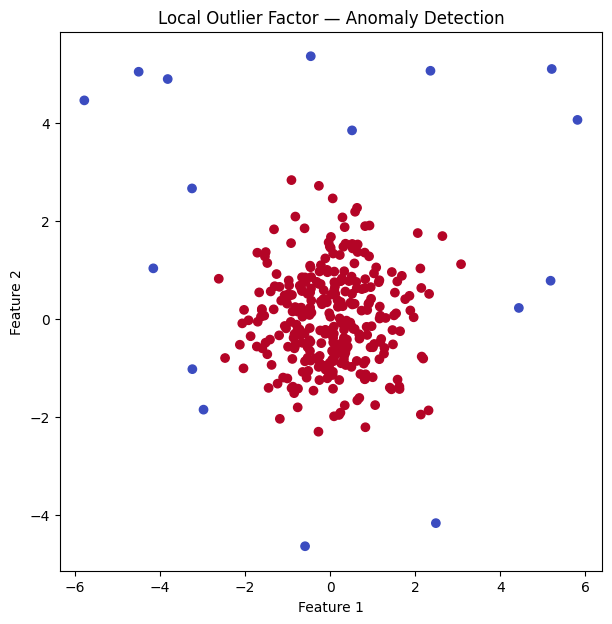

In [5]:
# Q9 Code — Local Outlier Factor

from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
rng = np.random.RandomState(42)
X = rng.randn(300, 2)
outliers = rng.uniform(low=-6, high=6, size=(20, 2))
X = np.r_[X, outliers]

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
labels = lof.fit_predict(X)

# Plot
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm')
plt.title("Local Outlier Factor — Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# **Question 10**
## **Explain your real-time data science workflow for energy demand forecasting and anomaly detection.**


# **Answer**

###  **1. Anomaly Detection (Real-Time)**
Use **Isolation Forest or LOF** on recent sliding-window data:

- Isolation Forest → fast, handles numerical streaming data  
- LOF → detects local abnormal spikes/drops  
- DBSCAN → good for density-based anomalies  

Streaming pipeline:
1. Read 15-minute data  
2. Clean + normalize  
3. Apply model (IF/LOF)  
4. Flag abnormal spikes or drops  

---

###  **2. Forecasting Model (Short-Term)**  
Use **SARIMAX**, because:

- Data is seasonal (daily & weekly patterns)  
- Weather and region influence energy usage  
- SARIMAX handles external features (temperature, humidity, events)

---

###  **3. Validation & Monitoring**
- Track **MAE, RMSE** over time  
- Retrain model weekly or monthly  
- Set alerts when prediction error > threshold  

---

###  **4. Business Impact**
- Detect overload risk early  
- Prevent grid failures  
- Improve scheduling & energy distribution  
- Reduce power loss and outages  



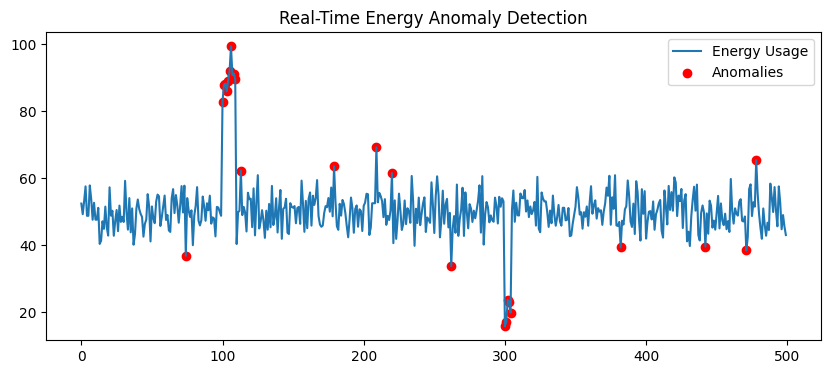

In [7]:
# Q10 Code — Simple Example Pipeline

import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Generate sample 15-minute energy usage data
rng = np.random.RandomState(42)
energy = 50 + 5*rng.randn(500)  # normal usage
energy[100:110] += 40           # abnormal spike
energy[300:305] -= 30           # abnormal drop

# Fit Isolation Forest
clf = IsolationForest(contamination=0.05, random_state=42)
labels = clf.fit_predict(energy.reshape(-1,1))

# Plot
plt.figure(figsize=(10,4))
plt.plot(energy, label="Energy Usage")
plt.scatter(np.where(labels==-1), energy[labels==-1], color='red', label='Anomalies')
plt.title("Real-Time Energy Anomaly Detection")
plt.legend()
plt.show()
